In [1]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
img_raw = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\S_S\Image Process\Avatar_2022.jpg")

img_raw_gray = cv2.imread(r"C:\Users\kr937\Desktop\drive\2023\S_S\Image Process\Avatar_2022.jpg", 0)

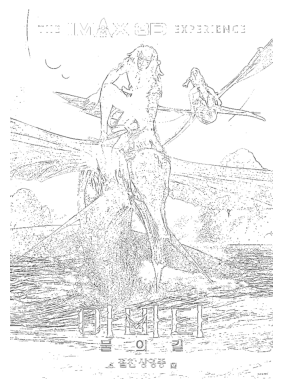

In [27]:
### 영상 출력
img_rgb = cv2.cvtColor(img_4, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [7]:
mask = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
img_1 = cv2.filter2D(img_raw_gray, -1, mask)

In [22]:
mask1 = np.array([[-1, -2, -1], [-2, 13, -2], [-1, -2, -1]])
img_2 = cv2.filter2D(img_1, -1, mask1)

In [24]:
img_3 = cv2.subtract(img_2, img_1)

In [10]:
### 범위 강조 함수
def fn_highlight(img, min_value, max_value, out_value):
    lookUpTable = np.arange(256, dtype='uint8')
    lookUpTable[(lookUpTable >= min_value) & (lookUpTable < max_value)] = out_value
    return cv2.LUT(img, lookUpTable)

In [26]:
img_4 = cv2.add(fn_highlight(img_3, 0, 45, 255), fn_highlight(img_3, 45, 255, 0))

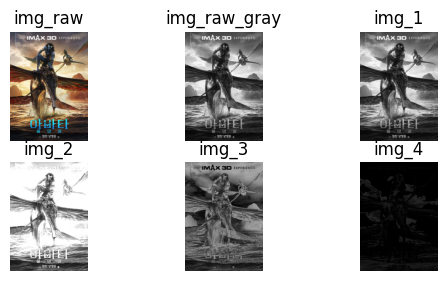

In [12]:
### 영상 출력
titles = ["img_raw", "img_raw_gray","img_1", "img_2", "img_3", "img_4"]
images = [img_raw, img_raw_gray, img_1, img_2, img_3, img_4]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(3, 3, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()